In [6]:
import pandas as pd
import glob
import numpy as np

In [10]:
all_csv = glob.glob("C:/Users/USER/Jupyter/Personal Data/WhatsApp*.txt")

list_csv = []

for filename in all_csv:
    df = pd.read_csv(filename,header=None, sep='\t')
    list_csv.append(df)

msg = pd.concat(list_csv, axis=0, ignore_index=True)

In [11]:
for data in list_csv:
    print(data.shape)
msg.shape

(30370, 1)
(43207, 1)


(73577, 1)

In [13]:
#msg = pd.read_table("WhatsApp Chat with Ifemide.txt", header=None)
msg.head()

,0
0,"26/12/2017, 8:20 am - Messages to this chat an..."
1,"26/12/2017, 8:17 am - Ifemide: Francis"
2,"26/12/2017, 8:17 am - Ifemide: Merry Christmas 😀"
3,"26/12/2017, 8:25 am - PHOENIX🦅: Thank you swee..."
4,"26/12/2017, 8:25 am - PHOENIX🦅: I love you dearly"


Instead of parsing TSV manually using Python, we can just take advantage of pandas! Let's go ahead and import it!

In [16]:
msg.columns

Int64Index([0], dtype='int64')

In [17]:
#msg.drop(axis=1, columns=[2, 3], inplace = True)
msg.drop(axis=0, index=0, inplace=True)
msg.columns

Int64Index([0], dtype='int64')

In [18]:
msg.columns = ['Message']
msg.columns

Index(['Message'], dtype='object')

In [19]:
msg.head()

,Message
1,"26/12/2017, 8:17 am - Ifemide: Francis"
2,"26/12/2017, 8:17 am - Ifemide: Merry Christmas 😀"
3,"26/12/2017, 8:25 am - PHOENIX🦅: Thank you swee..."
4,"26/12/2017, 8:25 am - PHOENIX🦅: I love you dearly"
5,"26/12/2017, 8:28 am - PHOENIX🦅: Hope you had fun?"


In [20]:
qq=pd.DataFrame(msg['Message'].str.split('-').str[1])
msg['Date']=msg['Message'].str.split('-').str[0]
msg['sender']=qq.Message.str.split(":").str[0]
msg['message']=qq.Message.str.split(":").str[1]
msg.drop(axis=1, columns ='Message', inplace=True)
msg.head()

,Date,sender,message
1,"26/12/2017, 8:17 am",Ifemide,Francis
2,"26/12/2017, 8:17 am",Ifemide,Merry Christmas 😀
3,"26/12/2017, 8:25 am",PHOENIX🦅,Thank you sweetheart
4,"26/12/2017, 8:25 am",PHOENIX🦅,I love you dearly
5,"26/12/2017, 8:28 am",PHOENIX🦅,Hope you had fun?


In [22]:
#msg['Date'] = msg['Date'] + msg['date2']
#msg.drop(axis=1, columns='date2', inplace=True)
#msg.head()
msg['message'].value_counts().head()

 <Media omitted>    2592
 Lol                1132
 Okay                609
 Ok                  588
 Hmmmmmm             297
Name: message, dtype: int64

In [23]:
msg['message'].replace(to_replace=[' <Media omitted>', ' Lol'], value=[np.nan, np.nan], inplace=True)
msg.dropna(inplace=True)

In [24]:
msg.sender.replace(to_replace = [' Francis Atoyebi', ' atoyebi280',' PHOENIX🦅', ' Upendo', ' Ifemide'], value=['Francis', 'Francis','Francis', 'Ifemide', 'Ifemide'], inplace=True)

In [39]:
msg['length'] = msg.message.astype('str').apply(len)
msg.head()
msg.reset_index(drop = True, inplace=True)

In [74]:
to_drop = msg[msg['sender']!='Francis']
to_drop = to_drop[to_drop['sender']!='Ifemide']
to_drop

,Date,sender,message,length
44750,Three by,elections into the House of Reps were held in ...,"one in Bauchi; one in Katsina; one in Kwara, ...",195
49282,To read full article 🔗,http,//v.duta.us/rVFBzgAA,22
51716,Kenneth Kanebi,Head of Equities Trading at Rand Merchant Bank,“Understanding Nigerian Equities Market,40
51717,Josh Bamfo,Head and Partner at Andersen Tax,“Transfer Pricing in Nigeria.,30
57228,"At MBUSI, they offer 6",month internships in the following fields but ...,,0
61745,*Discover the career you should have according...,Briggs/Jung personality! Add to group,+919360906674 Type funquiz to find out!*,41


In [81]:
index = to_drop.index.to_list()
msg.drop(index=index, inplace=True)

KeyError: '[44750 49282 51716 51717 57228 61745] not found in axis'

In [ ]:
msg['sender']

In [56]:
senders = ['Francis', 'Ifemide']
for i in msg['message']:
    print(i)
    if msg[i]['sender'] == 'Francis':
        print(i)

 Francis


KeyError: ' Francis'

## Exploratory Data Analysis

Let's check out some of the stats with some plots and the built-in methods in pandas!

### Data Visualization
Let's visualize this! Let's do the imports:

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

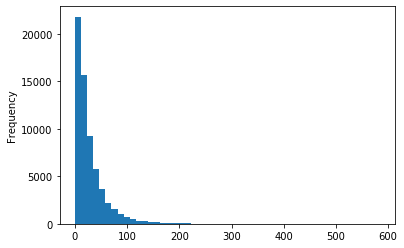

In [46]:
msg['length'].plot(bins=50, kind='hist') 

Play around with the bin size! Looks like text length may be a good feature to think about! Let's try to explain why the x-axis goes all the way to 1000ish, this must mean that there is some really long message!

In [34]:
msg.length.describe()

count    86122.000000
mean        28.493846
std         32.930346
min          0.000000
25%          8.000000
50%         18.000000
75%         36.000000
max        921.000000
Name: length, dtype: float64

Woah! 910 characters, let's use masking to find this message:

In [37]:
msg[msg['length'] == 921]['message'].iloc[0]

" I can't really articulate why I feel angered because of your dream but as much as we've been warned that you'll be jazzed in a kind of way and then this dream which you also said you don't understand what is happening. I think you should just be more careful about what Dcn Wale said and we shouldn't stop praying about this thing. My anger, to me it felt like you are informing me that it has happened, I'll implore you to be very careful for my selfish reasons but this is a thing that can make me burst in an uncontrollable anger and maybe make me hate you cos I might assumed you added to the event, although you obviously haven't done anything wrong at all even with gestures. But this kind of anger will make me hate everyone and just become a full time pervert reverting to listing girls I want to have sex with per month irrespective of their marital status. Basically, it will have a very negative effect on me."

Looks like we have some sort of Romeo sending texts! But let's focus back on the idea of trying to see if message length is a distinguishing feature between ham and spam:

In [38]:
msg[msg['sender']==' Ifemide'].hist(column='length', by='sender', bins=100,figsize=(24,4))

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 1728x288 with 0 Axes>

In [39]:
msg[msg['sender']=='Francis']['length'].max()

921

In [40]:
msg[msg['sender']=='Ifemide']['length'].max()

819

Very interesting! Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters. (Sorry Romeo!)

Now let's begin to process the data so we can eventually use it with SciKit Learn!

## Text Pre-processing

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.


In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [41]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

Now let's see how to remove stopwords. We can impot a list of english stopwords from NLTK (check the documentation for more languages and info).

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [43]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [44]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [45]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

Now let's put both of these together in a function to apply it to our DataFrame later on:

In [47]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Here is the original DataFrame again:

Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

Let's see an example output on on column:

**Note:**
We may get some warnings or errors for symbols we didn't account for or that weren't in Unicode (like a British pound symbol)

In [50]:
# Check to make sure its working
msg['message'].head(5).apply(text_process)

1                [Francis]
2    [Merry, Christmas, 😀]
3      [Thank, sweetheart]
4           [love, dearly]
5              [Hope, fun]
Name: message, dtype: object

In [51]:
# Show original dataframe
msg.head()

,Date,sender,message,length
1,"26/12/2017, 8:17 am",Ifemide,Francis,8
2,"26/12/2017, 8:17 am",Ifemide,Merry Christmas 😀,18
3,"26/12/2017, 8:25 am",Francis,Thank you sweetheart,21
4,"26/12/2017, 8:25 am",Francis,I love you dearly,18
5,"26/12/2017, 8:28 am",Francis,Hope you had fun?,18


### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand and so I'll leave you to explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

## Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the **analyzer** to be our own previously defined function:

In [53]:
msg.dropna(inplace=True)

# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(msg['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

18708


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [54]:
message4 = msg['message'][3]
print(message4)

 Thank you sweetheart


Now let's see its vector representation:

In [55]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 5118)	1
  (0, 15821)	1
(1, 18708)


This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once. Let's go ahead and check and confirm which ones appear twice:

In [56]:
print(bow_transformer.get_feature_names()[4071])
print(bow_transformer.get_feature_names()[5781])

Persons
Young


Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:

In [ ]:
messages_bow = bow_transformer.transform(msg['message'])

In [ ]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

In [161]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

Let's go ahead and see how we can do this in SciKit Learn:

In [163]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 5781)	0.5180330573257395
  (0, 4071)	0.8553605973609886


We'll go ahead and check what is the IDF (inverse document frequency) of the word `"u"` and of word `"university"`?

In [164]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

7.549907486353029
10.114856843814566


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [165]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(27267, 9251)


There are many ways the data can be preprocessed and vectorized. These steps involve feature engineering and building a "pipeline". I encourage you to check out SciKit Learn's documentation on dealing with text data as well as the expansive collection of available papers and books on the general topic of NLP.

## Training a model

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the Naive Bayes classifier algorithm is a good choice.

We'll be using scikit-learn here, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

In [52]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Let's try classifying our single random message and checking how we do:

In [54]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


Fantastic! We've developed a model that can attempt to predict spam vs ham classification!

## Part 6: Model Evaluation
Now we want to determine how well our model will do overall on the entire dataset. Let's begin by getting all the predictions:

In [55]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


We can use SciKit Learn's built-in classification report, which returns [precision, recall,](https://en.wikipedia.org/wiki/Precision_and_recall) [f1-score](https://en.wikipedia.org/wiki/F1_score), and a column for support (meaning how many cases supported that classification). Check out the links for more detailed info on each of these metrics and the figure below:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [56]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



There are quite a few possible metrics for evaluating model performance. Which one is the most important depends on the task and the business effects of decisions based off of the model. For example, the cost of mis-predicting "spam" as "ham" is probably much lower than mis-predicting "ham" as "spam".

In the above "evaluation",we evaluated accuracy on the same data we used for training. **You should never actually evaluate on the same dataset you train on!**

Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would trivially be 100%, even though we wouldn't be able to classify any new messages.

A proper way is to split the data into a training/test set, where the model only ever sees the **training data** during its model fitting and parameter tuning. The **test data** is never used in any way. This is then our final evaluation on test data is representative of true predictive performance.

## Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


The test size is 20% of the entire dataset (1115 messages out of total 5572), and the training is the rest (4457 out of 5572). Note the default split would have been 30/70.

## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [58]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [59]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11e795bf8>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [60]:
predictions = pipeline.predict(msg_test)

In [61]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1001
       spam       0.75      1.00      0.85       114

avg / total       0.97      0.97      0.97      1115



Now we have a classification report for our model on a true testing set! There is a lot more to Natural Language Processing than what we've covered here, and its vast expanse of topic could fill up several college courses! I encourage you to check out the resources below for more information on NLP!

## More Resources

Check out the links below for more info on Natural Language Processing:

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

# Good Job!